# Capstone Project 1 - Property Price Prediction




# Submitted by - RAHUL BIRLE

#  TASK 1 -- DATA EXTRACTION

In [1]:
# Importing all the necessary libraries and modules for data extraction
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\birle\Downloads\Property_data.csv")

In [3]:
df.head(5)

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Dimension of the dataset
df.shape

(1460, 81)

# TASK2 -- DATA EXPLORATION

In [5]:
# General Info about the dataset such as dtype,Number of columns,row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [6]:
# Correlation of different numeric columns with respect to Price(Target Feature)
df.corr()['PropPrice'].sort_values(ascending=False)

C:\Users\birle\AppData\Local\Temp\ipykernel_33544\953698730.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['PropPrice'].sort_values(ascending=False)


PropPrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
BasementCars            0.640409
BasementSqFootage       0.623431
BsmntSqFtage            0.613581
1stFlrSF                0.605852
Bath1                   0.560664
CntRmsUpLev             0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
BasementYrBlt           0.486362
ExteriorCladdingArea    0.477493
CntFireplaces           0.466929
BsmntFinSty1            0.386420
PropertyFrontage        0.351799
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
Bath2                   0.284108
PropertySize            0.263843
BsmtFullBath            0.227122
BsmtUnfSF               0.214479
BedroomUpLev            0.168213
ScreenPorch             0.111447
PoolArea                0.092404
SaleMon                 0.046432
3SsnPorch               0.044584
BsmtFinSF2             -0.011378
BsmtHalfBath           -0.016844
AddVal    

In [7]:
# Name of columns with null values
print('Columns and their null value count \n')
for i in df.columns:
    if (df[i].isnull().sum())> 0:
        print( i , '=' , df[i].isnull().sum())

Columns and their null value count 

PropertyFrontage = 259
Alley = 1369
ExteriorCladdingType = 8
ExteriorCladdingArea = 8
BsmntFinish = 37
BsmntMaintenance = 37
BsmntVisibility = 38
BsmntFinRat1 = 37
BsmntFinQual1 = 38
Electrical = 1
QualFireplace = 690
BasementType = 81
BasementYrBlt = 81
BasementFinish = 81
BasementQual = 81
BasementCond = 81
PoolQC = 1453
BoundaryFeatures = 1179
AddFeatures = 1406


# TASK 3 -- DATA CLEANING

<Axes: >

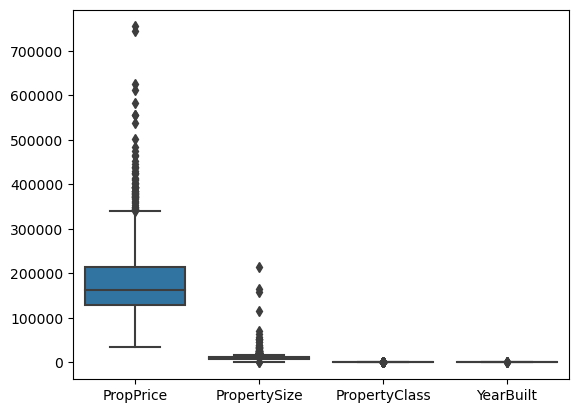

In [8]:
# Identifying outliers through boxplot
sns.boxplot(df[['PropPrice','PropertySize','PropertyClass','YearBuilt']])

In [9]:
# Treating the outliers through Capping method
for i in df.columns:
    if df[i].dtype!='object':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR=q3-q1
    
        lower = q1-1.5*IQR
        upper = q3+1.5*IQR
        df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

<Axes: >

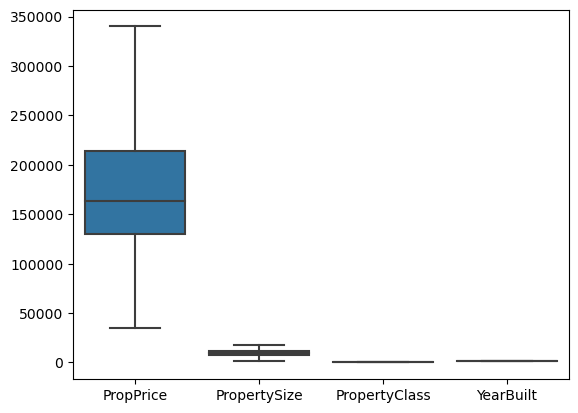

In [10]:
# Checking outliers after Capping
sns.boxplot(df[['PropPrice','PropertySize','PropertyClass','YearBuilt']])

In [11]:
# Filling null values in object dtype through Mode of corresponding columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
# Filling null values in numeric dtypes through mean of corresponding column
for i in df.columns:
    if df[i].dtype!='object':
        df[i].fillna(df[i].mean(),inplace=True)

In [13]:
# Checking null values after treatment
for i in df.columns:
    if (df[i].isnull().sum())> 0:
        print( i , '=' , df[i].isnull().sum())
    else:
        print('No null values are found')
    break

No null values are found


In [15]:
# Finding unique values in Categorical Columns 
print('Unique Values in categorical Columns \n')
for i in df.columns:
    if df[i].dtype=='object':
     print(i,':', len(df[i].unique()))

Unique Values in categorical Columns 

PropertyZone : 5
Street : 2
Alley : 2
PropertyShape : 4
Elevation : 4
Amenities : 2
Orientation : 5
Grade : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
PropertyStyle : 8
RoofStyle : 6
RoofMatl : 8
Roof1Material : 15
Roof2Material : 16
ExteriorCladdingType : 4
ExterQual : 4
ExterCond : 5
PropertyFooting : 6
BsmntFinish : 4
BsmntMaintenance : 4
BsmntVisibility : 4
BsmntFinRat1 : 6
BsmntFinQual1 : 6
Heating : 6
HeatingEfficiency : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
QualFireplace : 5
BasementType : 6
BasementFinish : 3
BasementQual : 5
BasementCond : 5
PavedDrive : 3
PoolQC : 3
BoundaryFeatures : 4
AddFeatures : 4
SaleType : 9
SaleCondn : 6


In [16]:
# Checking skewness score of Target variable(PropPrice)
df['PropPrice'].skew()

0.8027863231337099

# TASK 4 -- DATA VISUALISATION

C:\Users\birle\AppData\Local\Temp\ipykernel_33544\2663213944.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PropPrice'])


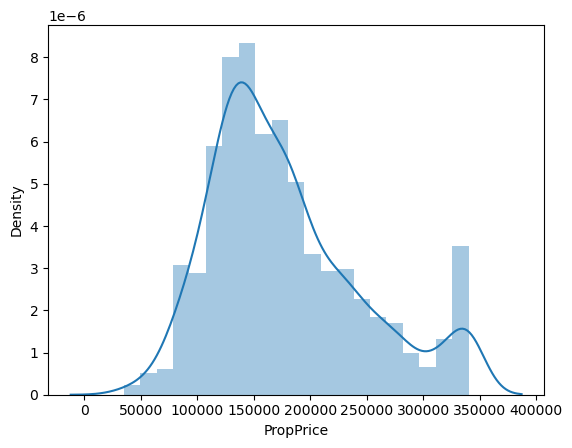

In [17]:
# Skewness of target feature through distplot
plt.figure()
sns.distplot(df['PropPrice'])
plt.show()

<Axes: xlabel='OverallQual', ylabel='PropPrice'>

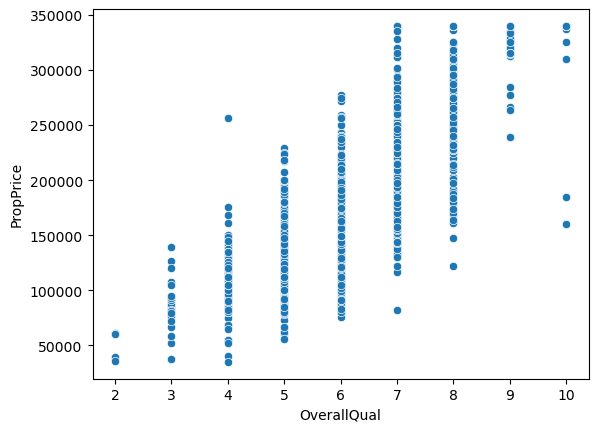

In [18]:
# Checking Correlation through scatterplot
sns.scatterplot(data=df,x='OverallQual',y='PropPrice')

<Axes: xlabel='BasementCars', ylabel='PropPrice'>

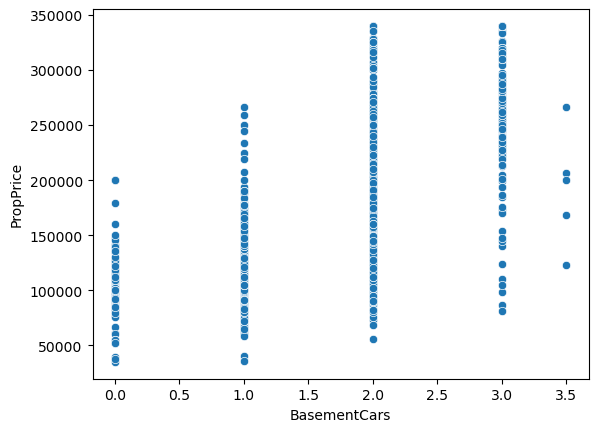

In [19]:
sns.scatterplot(data=df,x='BasementCars',y='PropPrice')

<Axes: xlabel='Bath1', ylabel='PropPrice'>

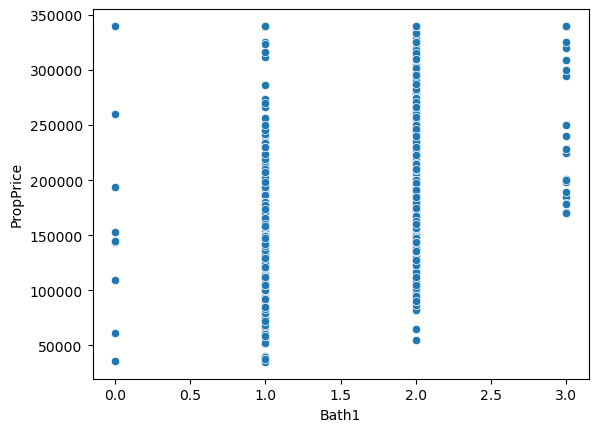

In [20]:
sns.scatterplot(data=df,x='Bath1',y='PropPrice')

<Axes: xlabel='PropertyZone', ylabel='PropPrice'>

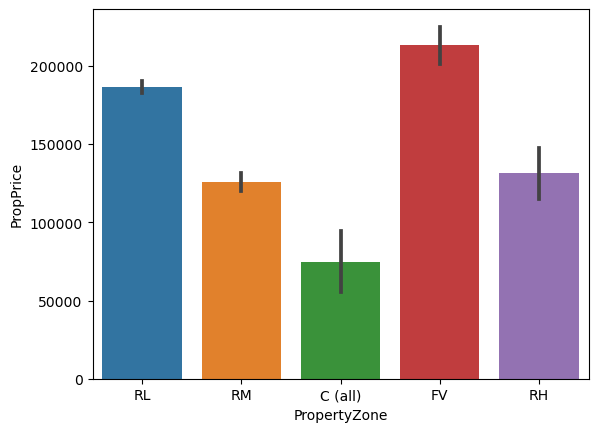

In [21]:
# Checking correlation between Price and Input features through Barplot
sns.barplot(x=df['PropertyZone'],y=df['PropPrice'])

<Axes: xlabel='Street', ylabel='PropPrice'>

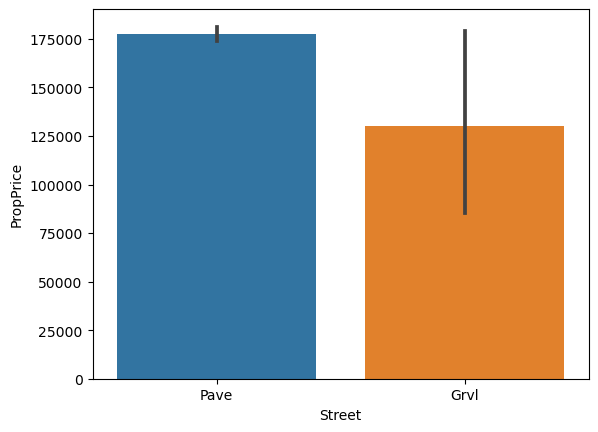

In [22]:
sns.barplot(x=df['Street'],y=df['PropPrice'])

<Axes: xlabel='PropertyShape', ylabel='PropPrice'>

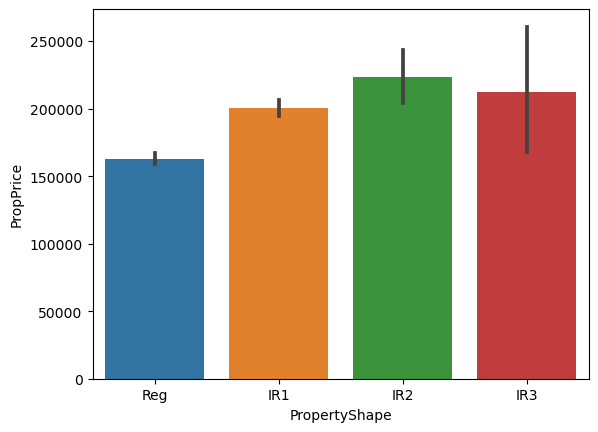

In [23]:
sns.barplot(x=df['PropertyShape'],y=df['PropPrice'])

<Axes: xlabel='Elevation', ylabel='PropPrice'>

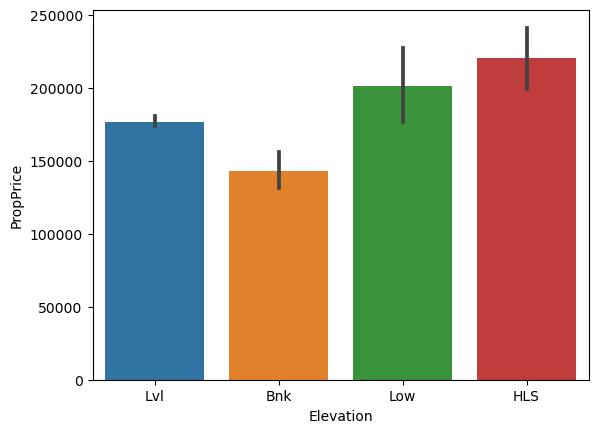

In [24]:
sns.barplot(x=df['Elevation'],y=df['PropPrice'])

<Axes: xlabel='Amenities', ylabel='PropPrice'>

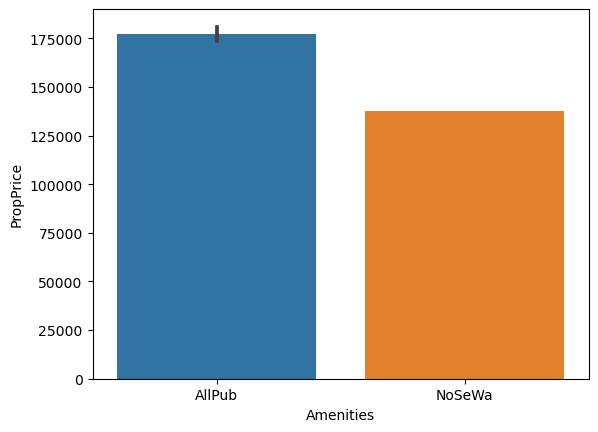

In [25]:
sns.barplot(x=df['Amenities'],y=df['PropPrice'])

<Axes: xlabel='PropertyStyle', ylabel='PropPrice'>

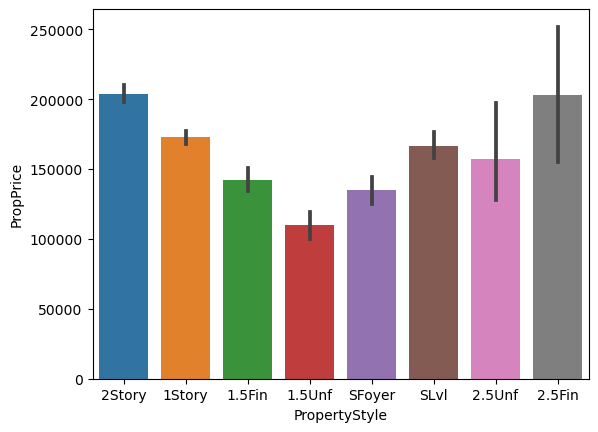

In [26]:
sns.barplot(x=df['PropertyStyle'],y=df['PropPrice'])

# TASK 5 -- MACHINE LEARNING MODEL BUILDING TO PREDICT THE PRICE

In [117]:
# Separating thhe Input features as x and target features as y
# Applying log function on target feature to reduce skewness
x = df.drop(['PropertyID','PropPrice'],axis=1)
y = np.log(df['PropPrice'])

In [118]:
x

,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,...,ScreenPorch,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn
0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0.0,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal
2,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0.0,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal
3,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml
4,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0.0,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,Gd,MnPrv,Shed,0.0,8.0,2007.0,WD,Normal
1456,20.0,RL,85.0,13175.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2010.0,WD,Normal
1457,70.0,RL,66.0,9042.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,Gd,GdPrv,Shed,0.0,5.0,2010.0,WD,Normal
1458,20.0,RL,68.0,9717.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,Gd,MnPrv,Shed,0.0,4.0,2010.0,WD,Normal


In [119]:
# Checking index value of input features (helpful in encoding)
for i in x.columns:
    if x[i].dtype=='object':
        print(i, x.columns.get_loc(i))

PropertyZone 1
Street 4
Alley 5
PropertyShape 6
Elevation 7
Amenities 8
Orientation 9
Grade 10
Neighborhood 11
Condition1 12
Condition2 13
BldgType 14
PropertyStyle 15
RoofStyle 20
RoofMatl 21
Roof1Material 22
Roof2Material 23
ExteriorCladdingType 24
ExterQual 26
ExterCond 27
PropertyFooting 28
BsmntFinish 29
BsmntMaintenance 30
BsmntVisibility 31
BsmntFinRat1 32
BsmntFinQual1 34
Heating 38
HeatingEfficiency 39
CentralAir 40
Electrical 41
KitchenQual 52
Functional 54
QualFireplace 56
BasementType 57
BasementFinish 59
BasementQual 62
BasementCond 63
PavedDrive 64
PoolQC 71
BoundaryFeatures 72
AddFeatures 73
SaleType 77
SaleCondn 78


In [120]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: PropPrice, Length: 1460, dtype: float64

In [121]:
# Splitting the data into trai and test sets 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [122]:
# Importing necessary libraries for transforming columns,Encoding,building pipeline,Scaling of data and checking accuracy.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_absolute_error

In [123]:
# Importing Machine Learning models to be build
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

Model 1 -- Linear Regression

In [229]:
# Performing Encoding(OneHotEncoding),Scaling of data,Principal Component Analysis and Linear Regression through different steps
lrstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

lrstep2 = StandardScaler()
lrstep3 = PCA(n_components=10)
lrstep4 = LinearRegression()


In [230]:
# Building Pipeline to combine all the steps of model building
lrpipe = Pipeline([
    ('lrstep1',lrstep1),
    ('lrstep2',lrstep2),
    ('lrstep3',lrstep3),
    ('lrstep4',lrstep4)
])

In [231]:
# Fitting our train-test data on the pipeline and making Prediction by checking r2 score and mean absolute error
lrpipe.fit(x_train,y_train)
y_pred = lrpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


R2 score 0.8467005536757104
mean absolute error 0.107205900391271


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [232]:
np.exp(0.10)

1.1051709180756477

MODEL 2 -- RIDGE REGRESSION

In [245]:
Rstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

Rstep2 = StandardScaler()
Rstep3 = PCA(n_components=10)
Rstep4 = Ridge(alpha=20)


In [246]:
# Building pipeline for Ridge Regression
Rpipe = Pipeline([
    ('Rstep1',Rstep1),
    ('Rstep2',Rstep2),
    ('Rstep3',Rstep3),
    ('Rstep4',Rstep4)
])

In [247]:
# Fitting Ridge pipeline on train test data and making prediction
Rpipe.fit(x_train,y_train)
y_pred = Rpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


R2 score 0.8449978126659294
mean absolute error 0.10785723654174546


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MODEL 3 -- LASSO REGRESSION

In [249]:
Lstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

Lstep2 = StandardScaler()
Lstep3 = PCA(n_components=10)
Lstep4 = Lasso(alpha=0.001)


In [250]:
Lpipe = Pipeline([
    ('Lstep1',Lstep1),
    ('Lstep2',Lstep2),
    ('Lstep3',Lstep3),
    ('Lstep4',Lstep4)
])

In [251]:
Lpipe.fit(x_train,y_train)
y_pred = Lpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


R2 score 0.8459209375583562
mean absolute error 0.1074028183025324


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MODEL 4 -- KNeighborsRegressor

In [253]:
Kstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

Kstep2 = StandardScaler()
Kstep3 = PCA(n_components=10)
Kstep4 = KNeighborsRegressor(n_neighbors=10)


In [254]:
# Building pipeline for respective model
Kpipe = Pipeline([
    ('Kstep1',Kstep1),
    ('Kstep2',Kstep2),
    ('Kstep3',Kstep3),
    ('Kstep4',Kstep4)
])

In [255]:
# Fitting train test data on respective model and checking aaccuracy
Kpipe.fit(x_train,y_train)
y_pred = Kpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


R2 score 0.8264371834463928
mean absolute error 0.11340061934276871


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MODEL 5 -- SUPPORT VECTOR REGRESSION (SVR)

In [257]:
Vstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

Vstep2 = StandardScaler()
Vstep3 = PCA(n_components=10)
Vstep4 = SVR(kernel='rbf',C=10000,epsilon=0.1)


In [258]:
Vpipe = Pipeline([
    ('Vstep1',Vstep1),
    ('Vstep2',Vstep2),
    ('Vstep3',Vstep3),
    ('Vstep4',Vstep4)
])

In [259]:
Vpipe.fit(x_train,y_train)
y_pred = Vpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7795129280375955
mean absolute error 0.1306865282402386


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MODEL 6 -- RANDOM FOREST REGRESSOR

In [260]:
RFstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

RFstep2 = StandardScaler()
RFstep3 = PCA(n_components=10)
RFstep4 = RandomForestRegressor(n_estimators=200,random_state=5,max_samples=0.8,max_features=0.90,max_depth=20)


In [261]:
RFpipe = Pipeline([
    ('RFstep1',step1),
    ('RFstep2',step2),
    ('RFstep3',step3),
    ('RFstep4',step4)
])

In [262]:
RFpipe.fit(x_train,y_train)
y_pred = RFpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8392079582607319
mean absolute error 0.10832090268515276


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MODEL 7 -- ADA BOOST REGRESSOR

In [263]:
ABstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

ABstep2 = StandardScaler()
ABstep3 = PCA(n_components=10)
ABstep4 = AdaBoostRegressor(n_estimators=200,learning_rate=0.8)


In [264]:
ABpipe = Pipeline([
    ('ABstep1',ABstep1),
    ('ABstep2',ABstep2),
    ('ABstep3',ABstep3),
    ('ABstep4',ABstep4)
])

In [265]:
ABpipe.fit(x_train,y_train)
y_pred = ABpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7508292479310859
mean absolute error 0.15399045935461375


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MODEL 8 -- GRADIENT BOOSTING REGRESSOR

In [266]:
GBstep1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,38,39,40,41,42,52,54,56,57,59,62,63,64,71,72,73,77,78])
],remainder='passthrough')

GBstep2 = StandardScaler()
GBstep3 = PCA(n_components=10)
GBstep4 = GradientBoostingRegressor(n_estimators=500)


In [267]:
GBpipe = Pipeline([
    ('GBstep1',GBstep1),
    ('GBstep2',GBstep2),
    ('GBstep3',GBstep3),
    ('GBstep4',GBstep4)
])

In [268]:
GBpipe.fit(x_train,y_train)
y_pred = GBpipe.predict(x_test)
print('R2 score', r2_score(y_test,y_pred))
print('mean absolute error', mean_absolute_error(y_test,y_pred))


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8428987837313275
mean absolute error 0.1050803827909642


C:\Users\birle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [15, 29, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# CONCLUSION -- LINEAR REGRESSION MODEL IS THE MOST ACCURATE MODEL BASED ON OUR ANALYSIS ON THE GIVEN DATASET

ACCURACY SCORE = 84%
MEAN ABSOLUTE ERROR = 0.10

# TASK 6 -- WEBSITE BUILDING AND DEPLOYMENT

In [228]:
import pickle

In [269]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(df,open('lrpipe.pkl','wb'))